# EDA part

### import data

In [36]:
import pandas as pd
import numpy as np
data1 = pd.read_csv("data1.csv")
data2 = pd.read_csv("data2.csv")
data3 = pd.read_csv("data3.csv")
data4 = pd.read_csv("data4.csv")
com1 = data1.append(data2)
com2 = com1.append(data3)
wine = com2.append(data4)
import seaborn as sns

### view data

In [37]:
wine.head(5)

,Unnamed: 0,country,description,points,price,province,variety,winery
0,1,US,This tremendous 100% varietal wine hails from ...,96,235,California,Cabernet Sauvignon,Heitz
1,2,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,3,US,Mac Watson honors the memory of a wine once ma...,96,90,California,Sauvignon Blanc,Macauley
3,4,US,"This spent 20 months in 30% new French oak, an...",96,65,Oregon,Pinot Noir,Ponzi
4,5,France,"This is the top wine from La Bégude, named aft...",95,66,Provence,Provence red blend,Domaine de la Bégude


### countplot between points & counts of wine

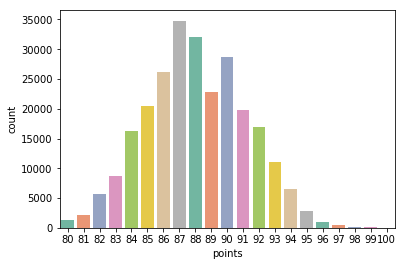

In [38]:
sns.countplot(wine['points'],palette='Set2')

### histgram of wine pirce (under USD200)

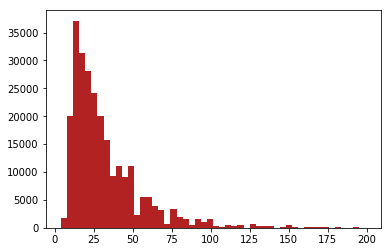

<Figure size 1872x1152 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
plt.hist(wine[wine['price'] < 200]['price'], bins=50,color = 'firebrick')
plt.figure(figsize=(26,16))
plt.show()

### line chart of wine price (under USD200)

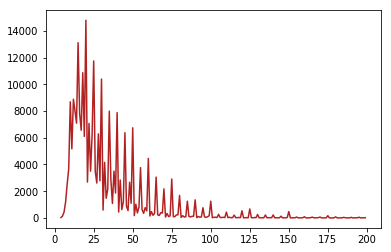

In [40]:
wine[wine['price'] < 200]['price'].value_counts().sort_index().plot.line(color = 'firebrick')

### jointplot of distribution of 'price' and 'point'

C:\Users\somno\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


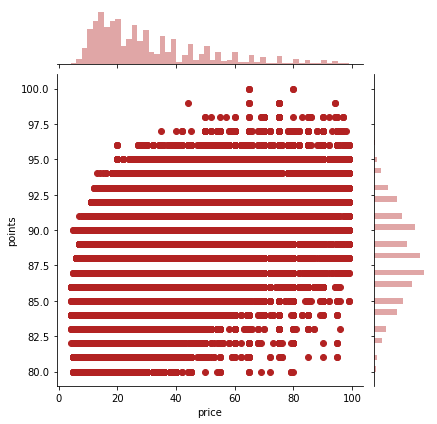

In [41]:
sns.jointplot(x='price', y='points', data=wine[wine['price'] < 100], color = 'firebrick')

### another jointplot of distribution of 'price' and 'point'

C:\Users\somno\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


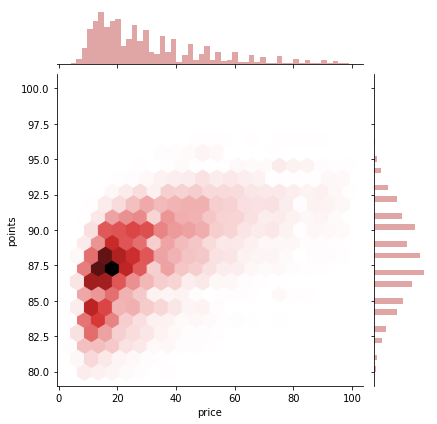

In [42]:
sns.jointplot(x='price', y='points', data=wine[wine['price'] < 100], kind='hex', 
              gridsize=20, color = 'firebrick')

### violin plot of variety and price

C:\Users\somno\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: 'AxesSubplot' object has no attribute 'set_ylable'

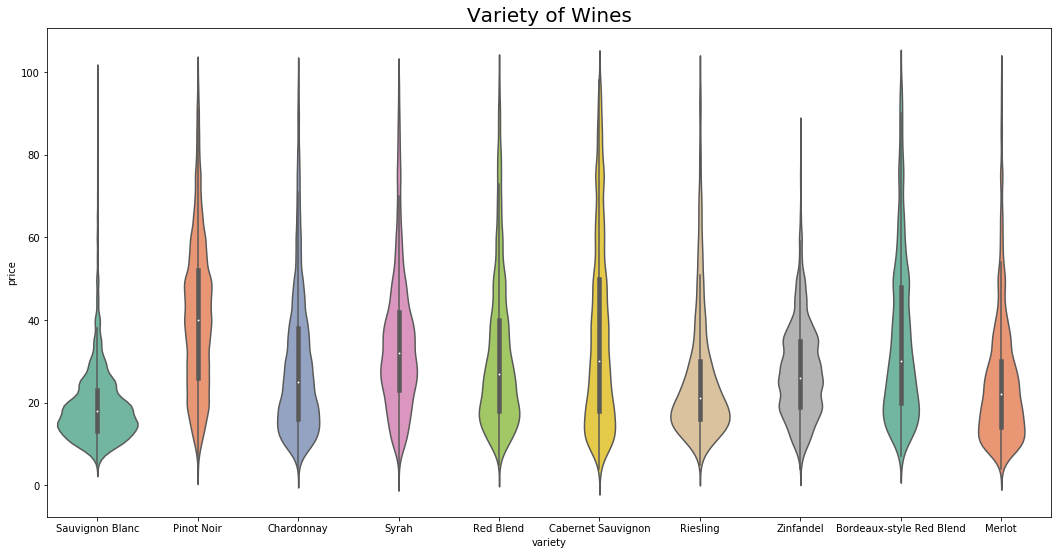

In [43]:
import matplotlib.pyplot as plt
wineprice=wine[wine['price'] < 100]
plt.figure(figsize=(18,9))
m = sns.violinplot(
    x='variety',
    y='price',
    data=wineprice[wineprice.variety.isin(wine.variety.value_counts()[:10].index)],
    palette='Set2'
)
m.set_title("Variety of Wines",fontsize = 20)
m.set_ylable("price",fontsize = 15)
m.set_xticklabels(m.get_xticklabels(), rotation=90)

plt.show()

### the top 20 countries of wine ocunts

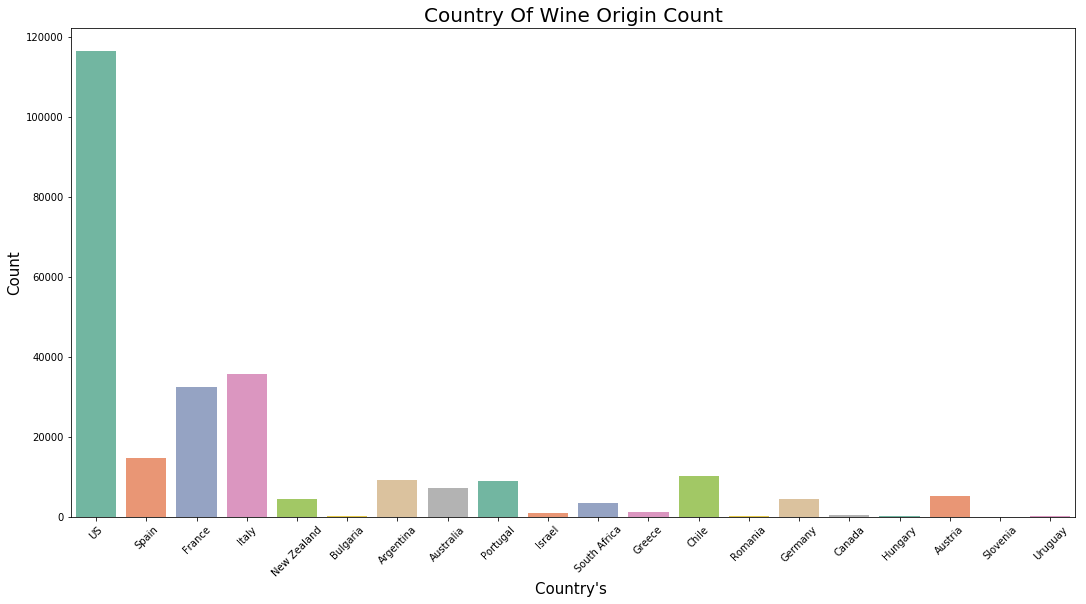

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))

country = wine.country.value_counts()[:20]

g = sns.countplot(x='country', data=wine[wine.country.isin(country.index.values)], palette='Set2')
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

### boxplot of countries and points of wine

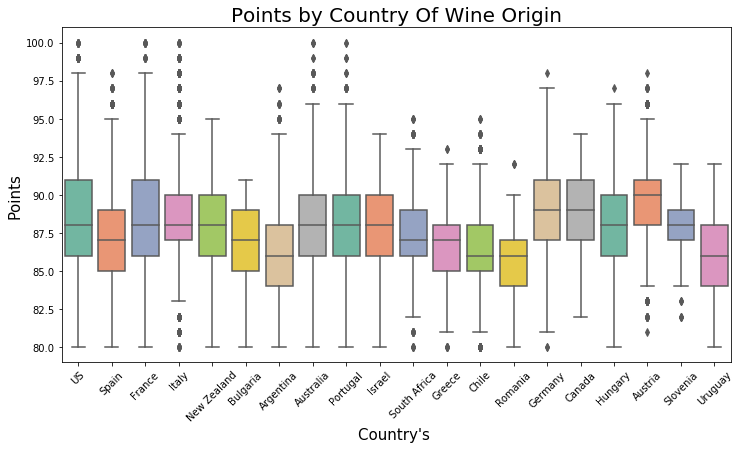

In [45]:
plt.figure(figsize=(12,6))

g1 = sns.boxplot(x='country', y='points',
                   data=wine[wine.country.isin(country.index.values)],palette='Set2')
g1.set_title("Points by Country Of Wine Origin", fontsize=20)
g1.set_xlabel("Country's ", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

### boxplot of country and prices of wine

<function matplotlib.pyplot.show(*args, **kw)>

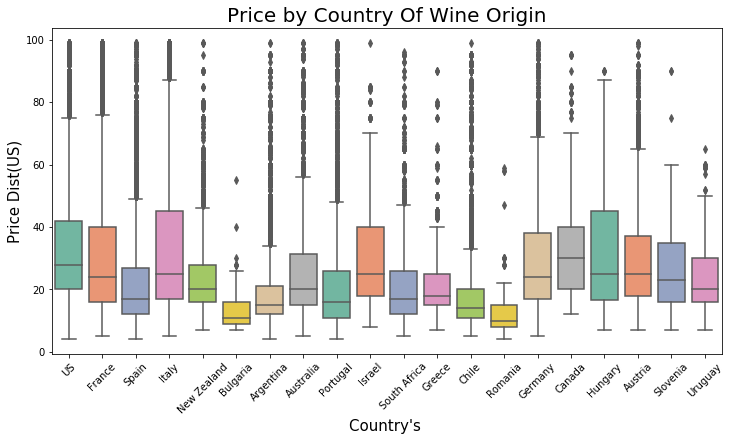

In [46]:
plt.figure(figsize=(12,6))
l = sns.boxplot(x='country', y='price',
                  data=wineprice.loc[(wineprice.country.isin(country.index.values))],
               palette='Set2')
l.set_title("Price by Country Of Wine Origin", fontsize=20)
l.set_xlabel("Country's ", fontsize=15)
l.set_ylabel("Price Dist(US)", fontsize=15)
l.set_xticklabels(l.get_xticklabels(),rotation=45)
plt.show

### histgram of top20 wine varieties which have largest outputs

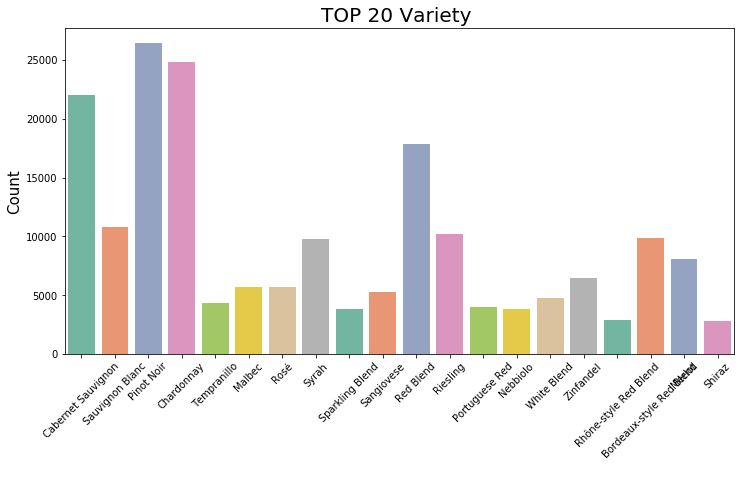

In [47]:
plt.figure(figsize=(12,6))

variety = wine.variety.value_counts()[:20]

g = sns.countplot(x='variety', 
                  data= wine.loc[(wine.variety.isin(variety.index.values))],
                 palette='Set2')
g.set_title("TOP 20 Variety ", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

### boxplot of prices and varieties of wine

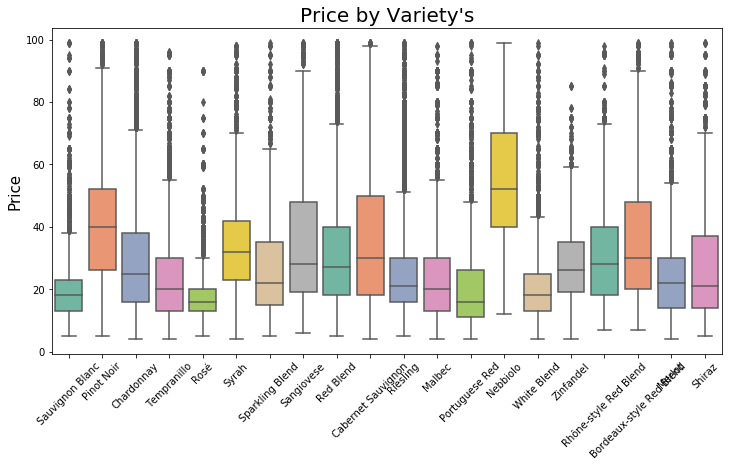

In [48]:
plt.figure(figsize=(12,6))
g1 = sns.boxplot(y='price', x='variety',
                  data=wineprice.loc[(wineprice.variety.isin(variety.index.values))],
                 palette='Set2')
g1.set_title("Price by Variety's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

### boxplot of length of wine['description'] and points

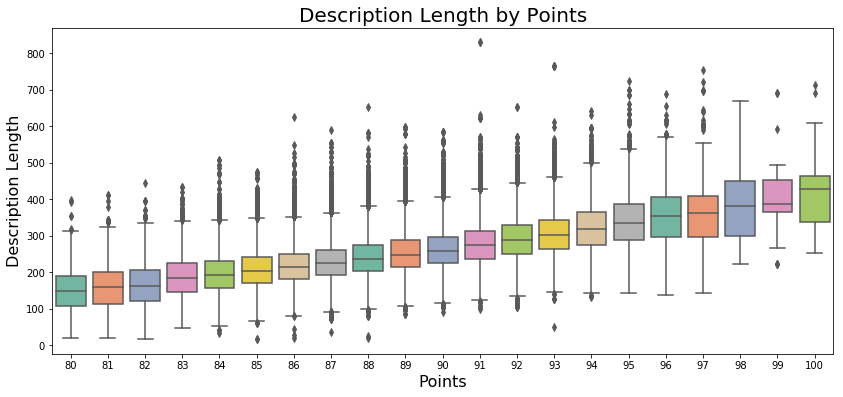

In [49]:
wine1 = wine.assign(desc_length = wine['description'].apply(len))
plt.figure(figsize=(14,6))
g = sns.boxplot(x='points', y='desc_length', data=wine1,palette='Set2')
g.set_title('Description Length by Points', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Points', fontsize = 16) # X label
plt.show()

### scatter plot of length of wine['description'] and prices

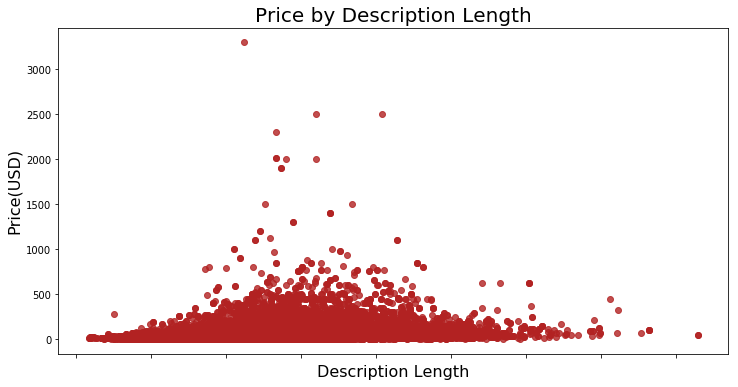

In [50]:
plt.figure(figsize=(12,6))
g = sns.regplot(x='desc_length', y='price',
                data=wine1, fit_reg=False, color = 'firebrick')
g.set_title('Price by Description Length', fontsize=20)
g.set_ylabel('Price(USD)', fontsize = 16) 
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

### top 5 countries sorted by mean of wine price

In [51]:
cnt = wine.groupby(['country'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending=False)[:5]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Reds',high=0.2)

,country,count,min,max,mean
0,Switzerland,11,19,160,63.9091
1,England,77,25,95,51.2468
2,France,32561,5,3300,43.1737
3,Hungary,375,7,764,42.8293
4,Germany,4467,5,775,40.5518


### top 5 areas sorted by mean of wine price

In [52]:
cnt = wine.groupby(['province','country'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:5]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Reds',high=0.2)

,province,country,count,min,max,mean
0,Colares,Portugal,3,30,495,201.333
1,Switzerland,Switzerland,3,160,160,160
2,Moscatel do Douro,Portugal,9,11,137,90.2222
3,Champagne,France,2472,10,1400,85.6072
4,Santa Cruz,Chile,10,35,100,85


### top5 areas sorted by maximum of wine price

In [53]:
cnt = wine.groupby(['province','country'])['price'].agg(['count','min','max','mean']).sort_values(by='max',ascending= False)[:5]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Reds',high=0.2)

,province,country,count,min,max,mean
0,Bordeaux,France,6660,6,3300,40.3845
1,Burgundy,France,6448,9,2500,70.8221
2,California,US,80460,4,2013,37.0923
3,Champagne,France,2472,10,1400,85.6072
4,Wachau,Austria,633,9,1100,46.534


###  top5 areas sorted by counts of wine

In [54]:
cnt = wine.groupby(['province','country'])['price'].agg(['count','min','max','mean']).sort_values(by='count',ascending= False)[:5]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Reds',high=0.2)

,province,country,count,min,max,mean
0,California,US,80460,4,2013,37.0923
1,Washington,US,18267,6,240,30.8231
2,Tuscany,Italy,11089,6,900,47.9197
3,Oregon,US,9930,5,275,35.4095
4,Northern Spain,Spain,8620,5,600,30.4666


# Data preprocessing

In [9]:
des = wine['description']
des.head(5)

0    This tremendous 100% varietal wine hails from ...
1    Ripe aromas of fig, blackberry and cassis are ...
2    Mac Watson honors the memory of a wine once ma...
3    This spent 20 months in 30% new French oak, an...
4    This is the top wine from La Bégude, named aft...
Name: description, dtype: object

### hashing vectorized

In [10]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = des
# create the transform
vectorizer = HashingVectorizer(n_features=20)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

wb = vector.toarray()

(258144, 20)
[[-0.10660036  0.          0.10660036 ...  0.          0.21320072
   0.10660036]
 [-0.12038585  0.          0.36115756 ...  0.24077171  0.
   0.        ]
 [ 0.          0.21199958  0.         ...  0.10599979 -0.10599979
   0.        ]
 ...
 [ 0.          0.          0.3721042  ...  0.49613894  0.
   0.        ]
 [-0.25400025  0.          0.         ...  0.38100038  0.
   0.12700013]
 [-0.20412415 -0.20412415  0.20412415 ...  0.          0.
   0.20412415]]


### transfer wine['description'] to 20 vectors

In [11]:
dfff = pd.DataFrame(data=wb[0:,0:])
dfff.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.106600,0.000000,0.106600,0.106600,-0.426401,-0.533002,0.000000,0.1066,-0.213201,0.213201,0.213201,0.319801,-0.213201,0.319801,-0.213201,0.000000,0.000000,0.000000,0.213201,0.106600
1,-0.120386,0.000000,0.361158,0.240772,-0.240772,-0.601929,0.240772,0.0000,-0.120386,0.000000,0.000000,-0.120386,0.120386,0.120386,-0.240772,0.120386,0.361158,0.240772,0.000000,0.000000
2,0.000000,0.212000,0.000000,0.212000,0.000000,-0.529999,0.000000,0.1060,0.212000,0.529999,0.106000,-0.106000,0.000000,0.106000,0.212000,-0.106000,0.423999,0.106000,-0.106000,0.000000
3,0.000000,0.269408,0.089803,0.000000,-0.179605,-0.628619,0.179605,0.0000,0.089803,0.089803,0.179605,0.000000,-0.089803,0.179605,-0.359211,0.179605,0.000000,-0.269408,0.359211,-0.089803
4,-0.496139,-0.124035,0.124035,-0.248069,0.000000,-0.496139,0.000000,0.0000,0.000000,0.372104,0.000000,-0.248069,-0.124035,-0.124035,0.000000,0.124035,-0.124035,0.372104,-0.124035,0.000000


### combine wine['country','province','variety','winery']

In [12]:
rest = wine.drop(columns=['description','points','price'])
rest['combine'] = rest[rest.columns[0:]].apply(lambda x: ' '.join(x.astype(str)), axis=1)

rest.head(5)

,Unnamed: 0,country,province,variety,winery,combine
0,1,US,California,Cabernet Sauvignon,Heitz,1 US California Cabernet Sauvignon Heitz
1,2,Spain,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,2 Spain Northern Spain Tinta de Toro Bodega Ca...
2,3,US,California,Sauvignon Blanc,Macauley,3 US California Sauvignon Blanc Macauley
3,4,US,Oregon,Pinot Noir,Ponzi,4 US Oregon Pinot Noir Ponzi
4,5,France,Provence,Provence red blend,Domaine de la Bégude,5 France Provence Provence red blend Domaine d...


### transfer wine['country','province','variety','winery'] to four vectors

In [13]:
com = rest['combine']
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = com
# create the transform
vectorizer = HashingVectorizer(n_features=4)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())
comvar = vector.toarray()

(258144, 4)
[[-0.57735027 -0.57735027  0.          0.57735027]
 [-0.37139068 -0.55708601  0.74278135  0.        ]
 [-0.57735027  0.          0.57735027 -0.57735027]
 ...
 [ 0.          0.81649658  0.40824829  0.40824829]
 [ 0.63245553  0.63245553 -0.31622777 -0.31622777]
 [ 0.70710678  0.70710678  0.          0.        ]]


In [14]:
cfff = pd.DataFrame(data=comvar[0:,0:])
cfff.head(5)

,0,1,2,3
0,-0.577350,-0.577350,0.000000,0.57735
1,-0.371391,-0.557086,0.742781,0.00000
2,-0.577350,0.000000,0.577350,-0.57735
3,0.000000,0.000000,-1.000000,0.00000
4,0.000000,0.000000,0.554700,-0.83205


In [17]:
# total text to vector
fff = pd.concat([dfff,cfff],axis=1)
fff.head(5)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,0,1,2,3
0,-0.106600,0.000000,0.106600,0.106600,-0.426401,-0.533002,0.000000,0.1066,-0.213201,0.213201,...,-0.213201,0.000000,0.000000,0.000000,0.213201,0.106600,-0.577350,-0.577350,0.000000,0.57735
1,-0.120386,0.000000,0.361158,0.240772,-0.240772,-0.601929,0.240772,0.0000,-0.120386,0.000000,...,-0.240772,0.120386,0.361158,0.240772,0.000000,0.000000,-0.371391,-0.557086,0.742781,0.00000
2,0.000000,0.212000,0.000000,0.212000,0.000000,-0.529999,0.000000,0.1060,0.212000,0.529999,...,0.212000,-0.106000,0.423999,0.106000,-0.106000,0.000000,-0.577350,0.000000,0.577350,-0.57735
3,0.000000,0.269408,0.089803,0.000000,-0.179605,-0.628619,0.179605,0.0000,0.089803,0.089803,...,-0.359211,0.179605,0.000000,-0.269408,0.359211,-0.089803,0.000000,0.000000,-1.000000,0.00000
4,-0.496139,-0.124035,0.124035,-0.248069,0.000000,-0.496139,0.000000,0.0000,0.000000,0.372104,...,0.000000,0.124035,-0.124035,0.372104,-0.124035,0.000000,0.000000,0.000000,0.554700,-0.83205


In [18]:
# save as csv
from pandas import ExcelWriter

#writer = ExcelWriter('combine.xlsx')
#cfff.to_excel(writer,'Sheet5')
#writer.save()

# DF TO CSV
fff.to_csv('vector.csv', sep=',')

In [26]:
import numpy as np
import pandas as pd
import sklearn as sk
import time

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

C:\Users\somno\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# KNN algorithm 

In [19]:
# take samples
#mysample = fff.sample(n=10000)

In [30]:
# split sample/test set
import numpy as np  
import matplotlib.pyplot as plt  

X = fff
y = wine['price']

0    235
1    110
2     90
3     65
4     66
Name: price, dtype: int64

### split test size:test size:20%

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  

In [ ]:
# rescale my data
from sklearn.preprocessing import StandardScaler  
#scaler = StandardScaler()  
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)  
#X_test = scaler.transform(X_test)  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
#classifier = KNeighborsClassifier(n_neighbors=3)  
#classifier.fit(X_train, y_train)  

In [ ]:
#print(X_test[:1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
#classifier = KNeighborsClassifier(n_neighbors=3,algorithm='brute')
#classifier.fit(X_train, y_train) 

In [ ]:
#y_pred = classifier.predict(X_test) 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test, y_pred))  
#print(classification_report(y_test, y_pred))  

### Ball Tree (Advanced KNN)

In [32]:
# split x and y, train and test
x = fff
y = wine['price']
x_array = np.asarray(x)
y_array = np.ravel(y)
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size = 0.2)

In [33]:
# Label y
for i in range(len(y_array)):
    if y_array[i] <= 50:
        y_array[i] = 1
    elif y_array[i] > 50 and y_array[i] <= 100:
        y_array[i] = 2
    elif y_array[i] > 100 and y_array[i] <= 150:
        y_array[i] = 3
    elif y_array[i] > 150 and y_array[i] <= 200:
        y_array[i] = 4
    elif y_array[i] > 200:
        y_array[i] = 5

In [34]:
# define classifier
start = time.clock()

classifier = KNeighborsClassifier(algorithm = 'ball_tree')
classifier.fit(x_train, y_train)

end = time.clock()

print('Time used: %s seconds!'%(end - start))

C:\Users\somno\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Time used: 9.208456684000339 seconds!


C:\Users\somno\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


In [35]:
# test
start = time.clock()

x_array = np.asarray(x)[:len(x_array)]
y_array = np.ravel(y)[:len(y_array)]
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size = 0.2)

classifier = KNeighborsClassifier(algorithm = 'ball_tree')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(np.mean(y_pred == y_test))

end = time.clock()
print('Time used: %s seconds!'%(end - start))

C:\Users\somno\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.8426659435588526
Time used: 1274.5424852640008 seconds!


C:\Users\somno\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
